Przykład 1

In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_profiling import describe
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

df = pd.read_csv("/content/drive/My Drive/Dane/wine.csv")
print(df.head())
print(df.describe()) # statystyka opisowa

   Wine  Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0     1    14.23        1.71  2.43  15.6  127     2.80        3.06   
1     1    13.20        1.78  2.14  11.2  100     2.65        2.76   
2     1    13.16        2.36  2.67  18.6  101     2.80        3.24   
3     1    14.37        1.95  2.50  16.8  113     3.85        3.49   
4     1    13.24        2.59  2.87  21.0  118     2.80        2.69   

   Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
0                  0.28     2.29       5.64  1.04  3.92     1065  
1                  0.26     1.28       4.38  1.05  3.40     1050  
2                  0.30     2.81       5.68  1.03  3.17     1185  
3                  0.24     2.18       7.80  0.86  3.45     1480  
4                  0.39     1.82       4.32  1.04  2.93      735  
             Wine     Alcohol  Malic.acid         Ash         Acl          Mg  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.9382

In [5]:
X = df.values[:, 1:]
y = df.values[:, 0]
print(np.unique(y, return_counts=True)) #ile różnych etykiet i liczebność klas
# Podział na zbiór treningowy i testowy (dotyczy X i y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

(array([1., 2., 3.]), array([59, 71, 48]))


In [7]:
da = LinearDiscriminantAnalysis() # LDA
da.fit(X_train, y_train) # trenowanie klasyfikatora
y_train_pred = da.predict(X_train) # predykcja klas-zbiór terningowy
y_test_pred = da.predict(X_test) # predykcja klas - zbiór testowy
print('Accuracy (train):', accuracy_score(y_train, y_train_pred))
print('Accuracy (test):', accuracy_score(y_test, y_test_pred))

Accuracy (train): 1.0
Accuracy (test): 0.9722222222222222


In [8]:
# Obliczanie współczynników oceny modelu - zbiór testowy
print('Precision (test):', precision_score(y_test, y_test_pred, average=None))
print('Recall (test):', recall_score(y_test, y_test_pred, average=None))
print('F1 (test):', f1_score(y_test, y_test_pred, average=None))
labels = np.unique(y)
print(classification_report(y_test, y_test_pred, labels=labels))

Precision (test): [0.93333333 1.         1.        ]
Recall (test): [1.     0.9375 1.    ]
F1 (test): [0.96551724 0.96774194 1.        ]
              precision    recall  f1-score   support

         1.0       0.93      1.00      0.97        14
         2.0       1.00      0.94      0.97        16
         3.0       1.00      1.00      1.00         6

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



In [9]:
# macierz pomyłek dla zbioru testowego (tekst)
print('\nConfusion matrix (test)')
labels = np.unique(y)
cm = confusion_matrix(y_test, y_test_pred)
print(pd.DataFrame(cm, index=labels, columns=labels))


Confusion matrix (test)
     1.0  2.0  3.0
1.0   14    0    0
2.0    1   15    0
3.0    0    0    6



Confusion matrix – plot (test)


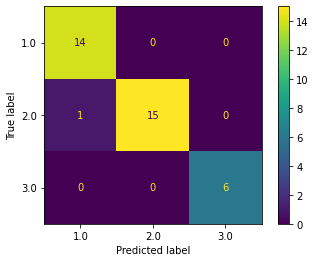

In [10]:
# macierz pomyłek dla zbioru testowego (grafika)
print('\nConfusion matrix – plot (test)')
disp = ConfusionMatrixDisplay(cm, display_labels=labels)
disp.plot()
plt.savefig('cm-wines-lda.png') # zapisanie rysunku
plt.show()

In [11]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_test_pred = qda.predict(X_test)
print('QDA Accuracy (test):', accuracy_score(y_test, y_test_pred))

QDA Accuracy (test): 1.0


In [12]:
from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier(n_neighbors=5) # modyfikować n_neighbors
kNN.fit(X_train, y_train)
y_test_pred = kNN.predict(X_test)
print('kNN Accuracy (test):', accuracy_score(y_test, y_test_pred))

kNN Accuracy (test): 0.8055555555555556


In [13]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(tol=0.001, max_iter=5000)
lr.fit(X_train, y_train)
y_test_pred = lr.predict(X_test)
print('lr Accuracy (test):', accuracy_score(y_test, y_test_pred))

lr Accuracy (test): 0.9722222222222222


Przykład 2

In [15]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_profiling import describe
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score

df = pd.read_csv("/content/drive/My Drive/Dane/wine.csv")
print(df.head())

   Wine  Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0     1    14.23        1.71  2.43  15.6  127     2.80        3.06   
1     1    13.20        1.78  2.14  11.2  100     2.65        2.76   
2     1    13.16        2.36  2.67  18.6  101     2.80        3.24   
3     1    14.37        1.95  2.50  16.8  113     3.85        3.49   
4     1    13.24        2.59  2.87  21.0  118     2.80        2.69   

   Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
0                  0.28     2.29       5.64  1.04  3.92     1065  
1                  0.26     1.28       4.38  1.05  3.40     1050  
2                  0.30     2.81       5.68  1.03  3.17     1185  
3                  0.24     2.18       7.80  0.86  3.45     1480  
4                  0.39     1.82       4.32  1.04  2.93      735  


In [16]:
X = df.values[:, 1:]
y = df.values[:, 0]
da = LinearDiscriminantAnalysis() # LDA

In [17]:
print('Cross-validation - v1')
# walidacja krzyżowa z podziałem zbioru na 5 części
scores = cross_val_score(da, X, y, cv=5)
# dokładność dla każdego podzbioru, średnia dokładność i std
print('Accuracy: ',scores)
print('Accuracy (mean): ', scores.mean())
print('Accuracy (std): ', scores.std())

Cross-validation - v1
Accuracy:  [1.         1.         0.94444444 0.94285714 0.97142857]
Accuracy (mean):  0.9717460317460318
Accuracy (std):  0.025205629512735514


In [18]:
from sklearn.model_selection import ShuffleSplit
# więcej informacji, jak prowadzić walidację (random)
cv = ShuffleSplit(n_splits=6, test_size=0.2, random_state=0)
scores = cross_val_score(da, X, y, cv=cv)
print('Accuracy: ',scores)
print('Accuracy (mean): ',scores.mean())
print('Accuracy (std): ',scores.std())

Accuracy:  [0.97222222 0.97222222 0.97222222 1.         1.         1.        ]
Accuracy (mean):  0.986111111111111
Accuracy (std):  0.013888888888888895


Zadanie domowe

In [24]:
df = pd.read_csv("/content/drive/My Drive/Dane/urine.csv")
print(df.head())

   id  r  gravity    ph  osmo  cond  urea  calc
0   1  0    1.021  4.91   725  20.9   443  2.45
1   2  0    1.017  5.74   577  20.0   296  4.49
2   3  0    1.008  7.20   321  14.9   101  2.36
3   4  0    1.011  5.51   408  12.6   224  2.15
4   5  0    1.005  6.52   187   7.5    91  1.16


In [30]:
X = df.values[:, 2:]
y = df.values[:, 1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [36]:
da = LinearDiscriminantAnalysis() # LDA

da.fit(X_train, y_train) # trenowanie klasyfikatora
y_test_pred1 = da.predict(X_test) # predykcja klas - zbiór testowy
print('LDA Accuracy:', accuracy_score(y_test, y_test_pred1))
print('LDA Precision:', precision_score(y_test, y_test_pred1))
print('LDA Recall:', recall_score(y_test, y_test_pred1))
print('LDA F1:', f1_score(y_test, y_test_pred1), "\n")


qda = QuadraticDiscriminantAnalysis()

qda.fit(X_train, y_train)
y_test_pred2 = qda.predict(X_test)
print('QDA Accuracy:', accuracy_score(y_test, y_test_pred2))
print('QDA Precision:', precision_score(y_test, y_test_pred2))
print('QDA Recall:', recall_score(y_test, y_test_pred2))
print('QDA F1:', f1_score(y_test, y_test_pred2), "\n")


kNN = KNeighborsClassifier(n_neighbors=5)

kNN.fit(X_train, y_train)
y_test_pred3 = kNN.predict(X_test)
print('kNN Accuracy:', accuracy_score(y_test, y_test_pred3))
print('kNN Precision:', precision_score(y_test, y_test_pred3))
print('kNN Recall:', recall_score(y_test, y_test_pred3))
print('kNN F1:', f1_score(y_test, y_test_pred3), "\n")


lr = LogisticRegression(tol=0.001, max_iter=5000)

lr.fit(X_train, y_train)
y_test_pred4 = lr.predict(X_test)
print('lr Accuracy:', accuracy_score(y_test, y_test_pred4))
print('lr Precision:', precision_score(y_test, y_test_pred4))
print('lr Recall:', recall_score(y_test, y_test_pred4))
print('lr F1:', f1_score(y_test, y_test_pred4))

LDA Accuracy: 0.8125
LDA Precision: 1.0
LDA Recall: 0.7272727272727273
LDA F1: 0.8421052631578948 

QDA Accuracy: 0.75
QDA Precision: 0.8888888888888888
QDA Recall: 0.7272727272727273
QDA F1: 0.7999999999999999 

kNN Accuracy: 0.5
kNN Precision: 1.0
kNN Recall: 0.2727272727272727
kNN F1: 0.42857142857142855 

lr Accuracy: 0.875
lr Precision: 1.0
lr Recall: 0.8181818181818182
lr F1: 0.9


In [43]:
print('Confusion matrix LDA')
labels = np.unique(y)
cm1 = confusion_matrix(y_test, y_test_pred1)
print(pd.DataFrame(cm1, index=labels, columns=labels), "\n")

print('Confusion matrix QDA')
labels = np.unique(y)
cm2 = confusion_matrix(y_test, y_test_pred2)
print(pd.DataFrame(cm2, index=labels, columns=labels), "\n")

print('Confusion matrix kNN')
labels = np.unique(y)
cm3 = confusion_matrix(y_test, y_test_pred3)
print(pd.DataFrame(cm3, index=labels, columns=labels), "\n")

print('Confusion matrix lr')
labels = np.unique(y)
cm4 = confusion_matrix(y_test, y_test_pred4)
print(pd.DataFrame(cm4, index=labels, columns=labels), "\n")

Confusion matrix LDA
     0.0  1.0
0.0    5    0
1.0    3    8 

Confusion matrix QDA
     0.0  1.0
0.0    4    1
1.0    3    8 

Confusion matrix kNN
     0.0  1.0
0.0    5    0
1.0    8    3 

Confusion matrix lr
     0.0  1.0
0.0    5    0
1.0    2    9 




Confusion matrix – plot 


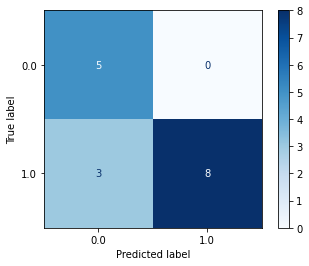

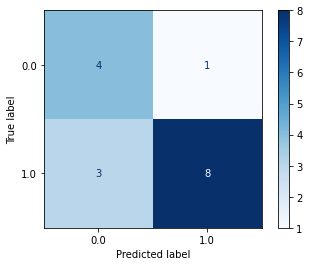

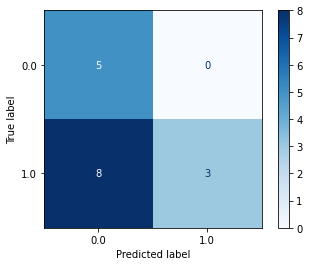

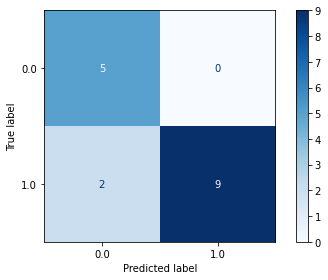

In [50]:
# macierz pomyłek dla zbioru testowego (grafika)
print('\nConfusion matrix – plot ')
ConfusionMatrixDisplay(cm1, display_labels=labels).plot(cmap="Blues")
ConfusionMatrixDisplay(cm2, display_labels=labels).plot(cmap="Blues")
ConfusionMatrixDisplay(cm3, display_labels=labels).plot(cmap="Blues")
ConfusionMatrixDisplay(cm4, display_labels=labels).plot(cmap="Blues")
plt.tight_layout()